In [2]:
# 数值计算库

import numpy as np
import pylab as pl
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import scipy
scipy.__version__

'1.7.1'

In [3]:
from scipy import constants as C
print(C.c) # 真空中的光速
print(C.h) # 普朗克常熟

299792458.0
6.62607015e-34


In [4]:
C.physical_constants['electron mass']

(9.1093837015e-31, 'kg', 2.8e-40)

In [5]:
# 1英里等于多少米，1英寸等于多少米，1克等于多少千克，1磅等于多少千克
print(C.mile)
print(C.inch)
print(C.gram)
print(C.pound)

1609.3439999999998
0.0254
0.001
0.45359236999999997


In [6]:
import scipy.special as S
print(1 + 1e-20)
print(np.log(1+1e-20))
print(S.log1p(1e-20))

1.0
0.0
1e-20


In [7]:
m = np.linspace(0.1, 0.9, 4)
u = np.linspace(-10,10,200)
results = S.ellipj(u[:, None],m[None,:])

print([y.shape for y in results])

[(200, 4), (200, 4), (200, 4), (200, 4)]


D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


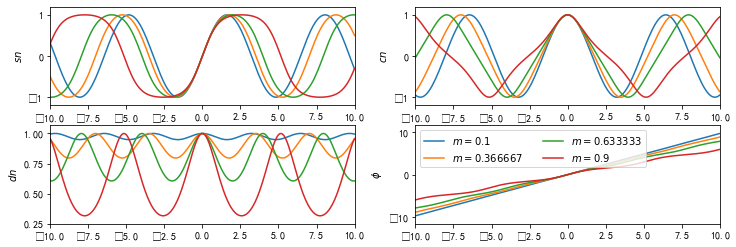

In [8]:
#%figonly=使用广播计算得到‘ellipj()’返回值
fig, axes = pl.subplots(2,2, figsize=(12,4))
labels = ["$sn$", "$cn$","$dn$","$\phi$"]
for ax,y,label in zip(axes.ravel(), results, labels):
    ax.plot(u,y)
    ax.set_ylabel(label)
    ax.margins(0,0.1)

axes[1,1].legend(["$m={:g}$".format(m_) for m_ in m], loc="best", ncol=2)

In [9]:

# 拟合与优化-optimize
# 非线性方程组求解
from scipy import optimize
from math import sin,cos

def f(x):
    x0, x1, x2 = x.tolist()
    return [
        5*x1 + 3,
        4*x0*x0 - 2*sin(x1*x2),
        x1*x2 - 1.5
    ]

# 计算方程组的误差，[1,1,1]是未知数的初始值
result = optimize.fsolve(f, [1,1,1])
print(result)
print(f(result))

[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [10]:
def j(x):
    x0,x1,x2 = x.tolist()
    return [
        [0,5,0],
        [8*x0, -2*x2*cos(x1*x2), -2*x1*cos(x1*x2)],
        [0,x2,x1]
    ]

result = optimize.fsolve(f, [1,1,1], fprime=j)
print(result)
print(f(result))


[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [11]:
# 最小二乘拟合

X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

def residuals(p):
    "计算以p为参数的直线和原始数据之间的误差"
    k, b = p
    return Y - (k*X + b)

# leastsq使得residuals()的输出数组的平方和最小，参数的初始值为[1,0]
r = optimize.leastsq(residuals, [1,0])
k, b = r[0]
print("k =",k,"b =",b)

k = 0.6134953491930442 b = 1.794092543259387


Text(0.5, 0, '$error$')

D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


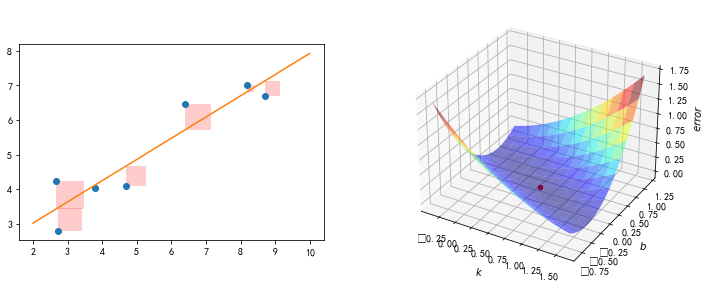

In [12]:
#%figonly=最小化正方形面积之和（左），误差曲面（右）
scale_k = 1.0
scale_b = 10.0
scale_error = 1000.0

def S(k, b):
    "计算直线y=k*x + b 和原始数据 X,Y的误差的平方和"
    error = np.zeros(k.shape)
    for x,y in zip(X,Y):
        error += (y - (k*x+b)) **2
    return error

ks,bs = np.mgrid[k - scale_k:k+scale_k:40j, b-scale_b:b+scale_b:40j]
error = S(ks,bs) / scale_error

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle

fig = pl.figure(figsize=(12,5))
ax1 = pl.subplot(121)
ax1.plot(X,Y,"o")
X0 = np.linspace(2,10,3)
Y0 = k*X0 + b
ax1.plot(X0,Y0)

for x,y in zip(X,Y):
    y2 = k*x + b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)
    ax1.add_patch(rect)

ax1.set_aspect("equal")

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot_surface(ks,bs/scale_b,error,rstride=3,cstride=3,cmap="jet",alpha=0.5)
ax2.scatter([k],[b/scale_b],[S(k,b)/scale_error], c="r",s=20)
ax2.set_xlabel("$k$")
ax2.set_ylabel("$b$")
ax2.set_zlabel("$error$")

真实参数： [10, 0.34, 0.5235987755982988]
拟合参数： [10.25218748  0.3423992   0.50817423]


D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\TJH\devEnv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


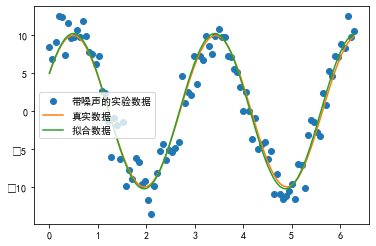

In [13]:
#%fig=带噪声的正弦波拟合
def func(x,p):
    """
    数据拟合所用的函数，A*sin(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

def residuals(p, y, x):
    """
    实验数据x,y和拟合函数之间的差，p为拟合需要找到的系数
    """
    return y-func(x,p)

x = np.linspace(0, 2*np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6 # 真实数据的函数参数
y0 = func(x, [A, k, theta]) # 真实数据
# 加入噪声之后的实验数据
np.random.seed(0)
y1 = y0 + 2*np.random.randn(len(x))

p0 = [7, 0.40, 0]  # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = optimize.leastsq(residuals, p0, args=(y1,x))

print(u"真实参数：", [A, k, theta])
print(u"拟合参数：", plsq[0])  #实验数据拟合后的参数

pl.plot(x, y1, "o", label=u"带噪声的实验数据")
pl.plot(x, y0, label=u"真实数据")
pl.plot(x, func(x, plsq[0]), label=u"拟合数据")
pl.legend(loc="best")

In [14]:
def func2(x, A, k, theta):
    return A*np.sin(2*np.pi*k*x + theta)

popt, _ = optimize.curve_fit(func2, x, y1, p0=p0)
print(popt)

[10.25218748  0.3423992   0.50817425]


In [15]:
popt, _ = optimize.curve_fit(func2, x, y1, p0=[10,1,0])
print(u"真是参数：", [A, k, theta])
print(u"拟合参数", popt)

真是参数： [10, 0.34, 0.5235987755982988]
拟合参数 [ 0.71093469  1.02074585 -0.12776742]


In [17]:
# 计算函数局域最小值
def target_function(x, y):
    return (1-x)**2 + 100 * (y - x**2)**2

class TargetFunction(object):
    
    def __init__(self):
        self.f_points = []
        self.fprime_points = []
        self.fhess_points = []
    
    
    def f(self, p):
        x,y = p.tolist()
        z = target_function(x,y)
        self.f_points.append((x,y))
        return z
    
    
    def fprime(self, p):
        x,y = p.tolist()
        self.fprime_points.append((x,y))
        dx = -2+2*x-400*x*(y-x**2)
        dy = 200 * y -200*x**2
        return np.array([dx,dy])
    
    
    def fhess(self, p):
        x,y = p.tolist()
        self.fhess_points.append((x,y))
        return np.array([[2*(600 * x**2 -200 * y +1), -400* x], [-400*x, 200]])
    

def fmin_demo(method):
    target = TargetFunction()
    init_point = (-1,-1)
    res = optimize.minimize(
        target.f,
        init_point,
        method=method,
        jac=target.fprime,
        hess=target.fhess)
    return res, [
        np.array(points) for points in (target.f_points,
                                       target.fprime_points,
                                       target.fhess_points)
    ]


methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B")
for method in methods:
    res, (f_points, fprime_points, fhess_points) = fmin_demo(method)
    print(
        "{:12s}: min={:12g},f count={:3d}, fprime count={:3d}, fhess count={:3d}".format(
        method, float(res["fun"]), len(f_points), len(fprime_points), len(fhess_points)))

Nelder-Mead : min= 5.30934e-10,f count=125, fprime count=  0, fhess count=  0
Powell      : min=           0,f count= 52, fprime count=  0, fhess count=  0
CG          : min= 9.63056e-21,f count= 39, fprime count= 39, fhess count=  0
BFGS        : min= 1.84992e-16,f count= 40, fprime count= 40, fhess count=  0
Newton-CG   : min= 5.22666e-10,f count= 60, fprime count= 60, fhess count= 38
L-BFGS-B    : min=  6.5215e-15,f count= 33, fprime count= 33, fhess count=  0


D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method Powell does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method CG does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method L-BFGS-B does not use Hessian information (h

D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method Powell does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method CG does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
D:\TJH\devEnv\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:527: RuntimeWarning: Method L-BFGS-B does not use Hessian information (h

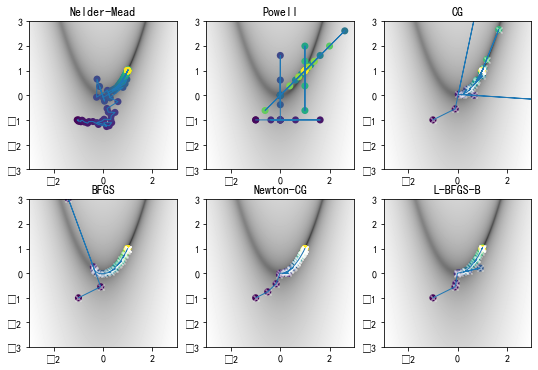

In [23]:
#%figonly=各种优化算法的搜索路径
def draw_fmin_demo(f_points, fprime_points, ax):
    xmin,xmax = -3,3
    ymin,ymax = -3,3
    Y,X = np.ogrid[ymin:ymax:500j, xmin:xmax:500j]
    Z = np.log10(target_function(X,Y))
    zmin, zmax = np.min(Z), np.max(Z)
    ax.imshow(Z, extent=(xmin,xmax,ymin,ymax), origin="lower",aspect="auto", cmap="gray")
    ax.plot(f_points[:,0], f_points[:,1],lw=1)
    ax.scatter(f_points[:,0],f_points[:,1],c=range(len(f_points)), s=50, linewidths=0)
    if len(fprime_points):
        ax.scatter(fprime_points[:,0], fprime_points[:,1],marker="x",color="w", alpha=0.5)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
fig, axes = pl.subplots(2,3,figsize=(9,6))
methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B")
for ax,method in zip(axes.ravel(), methods):
    res, (f_points,fprime_points,fhess_points) = fmin_demo(method)
    draw_fmin_demo(f_points, fprime_points, ax)
    ax.set_aspect("equal")
    ax.set_title(method)